In [1]:
%matplotlib inline

import numpy as np
import pylab as pl
import pykat


### My Functions
import EM

                                              ..-
    PyKat 1.0.17          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
P_out_list = []

offset_list = []

wavelength = 1064e-9
points = 100
for i in range(-points,points,1):
    
    phase = (float(i)/points) * 2 *np.pi
    
    E1 = EM.Plane.ComplexAmplitude(1.0,10,phase)
    E2 = EM.Plane.ComplexAmplitude(1.0,10)
    P_out = (E1+E2)*np.conjugate(E1+E2)
    
    P_out_list.append(P_out)
    offset_list.append( (360/(2*np.pi)) * phase)

In [3]:
waist = 1064e-9

zR = np.pi * (waist**2)/wavelength

E1 = EM.Gaussian.ComplexAmplitude(0,zR,0)
P1 = E1*np.conjugate(E1)

E2 = EM.Gaussian.ComplexAmplitude(zR,zR,0)
P2 = E2*np.conjugate(E2)

print(P1,P2)

(562337268542+0j) (281168634271+0j)


In [4]:
waist = 1e-6

zR = np.pi * (waist**2)/wavelength

print(zR)

p1_indv = []
P1 = 0

for i in range(0,1000,1):
    
    r = float(i)/1000 * waist 
    E1 = EM.Gaussian.ComplexAmplitude(0,zR,r)
    P1 += E1*np.conjugate(E1)
    p1_indv.append(E1*np.conjugate(E1))
    
print(sum(p1_indv))
print(P1)

2.952624674426497e-06
(3.81065503972e+14+0j)
(3.81065503972e+14+0j)


In [7]:
### Now for the more complicated Gaussian Beam
P_out_list_g = []

offset_list_g = []

waist = 1e-4
zR = np.pi * (waist**2)/wavelength

points = 100

for i in range(-points,points,1):
    phase = (float(i))/points * 2*np.pi
    
    ### for each phase shift in the beam phase, integrate the face of the beam.
    norm = EM.Gaussian.ComplexAmplitude(0,zR,0)
    P_indv = []
    for j in range(0,100,1):
        r = float(i)/100 * 3 * zR
    
        E1 = EM.Gaussian.ComplexAmplitude(10+phase,zR,r)/norm
        E2 = EM.Gaussian.ComplexAmplitude(10,zR,r)/norm
        P_out = (E1+E2)*np.conjugate(E1+E2)
        
        P_indv.append(P_out)

    P_out_list_g.append(2*np.pi*sum(P_indv))
    offset_list_g.append( (360/(2*np.pi)) * phase)

In [10]:
P_out_list_g

[(6.2694672856952925e-09+0j),
 (8.2312111590332272e-09+0j),
 (1.0777265279465519e-08+0j),
 (1.4072301478905614e-08+0j),
 (1.8324554117178284e-08+0j),
 (2.3796518811517891e-08+0j),
 (3.0818050986343895e-08+0j),
 (3.9802342953852065e-08+0j),
 (5.1265338955313554e-08+0j),
 (6.5849238423630306e-08+0j),
 (8.4350839154872507e-08+0j),
 (1.0775558418228156e-07+0j),
 (1.3727829976530514e-07+0j),
 (1.7441174297766658e-07+0j),
 (2.2098423694875676e-07+0j),
 (2.7922773320849756e-07+0j),
 (3.5185810512797189e-07+0j),
 (4.4216919693830963e-07+0j),
 (5.5414238903155647e-07+0j),
 (6.9257186621025058e-07+0j),
 (8.6322458635970819e-07+0j),
 (1.0729769561041116e-06+0j),
 (1.3300805038670029e-06+0j),
 (1.6442833131524759e-06+0j),
 (2.0271838140121848e-06+0j),
 (2.4923513448895465e-06+0j),
 (3.0565532259899513e-06+0j),
 (3.7342952135491186e-06+0j),
 (4.5532938526486233e-06+0j),
 (5.53577745853195e-06+0j),
 (6.7144060523009194e-06+0j),
 (8.1185731943097054e-06+0j),
 (9.7637567213726899e-06+0j),
 (1.17811665

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


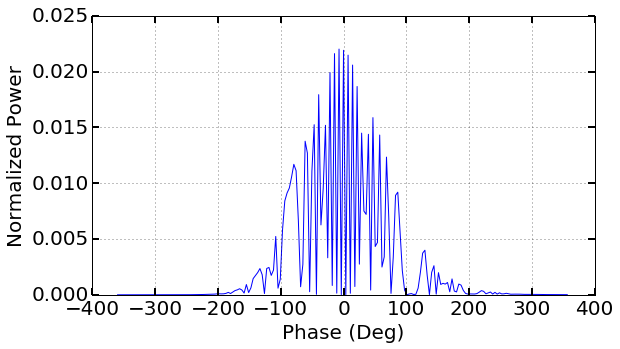

In [9]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)

pl.plot(offset_list_g,np.absolute(P_out_list_g))

pl.legend(fontsize=15)

pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("Normalized Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()